In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.13.0


In [4]:
print(keras)

<module 'keras.api._v2.keras' from 'c:\\users\\asus\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\keras\\api\\_v2\\keras\\__init__.py'>


In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

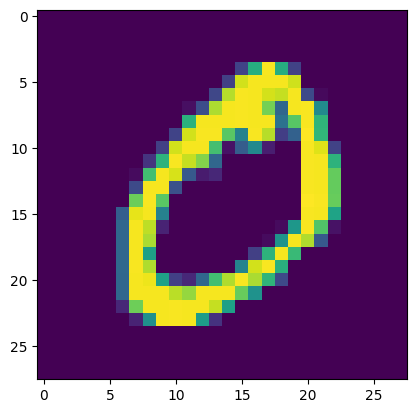

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [34]:
x_train = x_train/255.
x_test = x_test/255.

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [48]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 10)                170       
                                                                 
Total params: 50507 (197.29 KB)
Trainable params: 50507 (197.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 1.7417 - accuracy: 0.3093 - val_loss: 1.5277 - val_accuracy: 0.3874
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4396 - accuracy: 0.3995 - val_loss: 1.4018 - val_accuracy: 0.4339
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.3553 - accuracy: 0.4417 - val_loss: 1.3498 - val_accuracy: 0.4693
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2470 - accuracy: 0.5230 - val_loss: 1.1926 - val_accuracy: 0.5584
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.0835 - accuracy: 0.5811 - val_loss: 1.0586 - val_accuracy: 0.6179
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9738 - accuracy: 0.6269 - val_loss: 1.0003 - val_accuracy: 0.6457
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9018 - accuracy: 0.6462 - val_loss: 0.9493 - val_ac

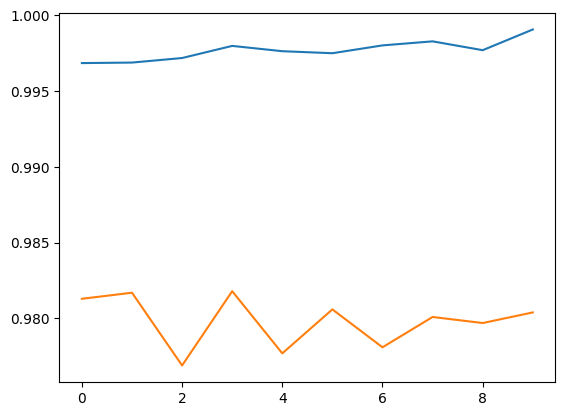

In [42]:
h = model.history.history #256
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

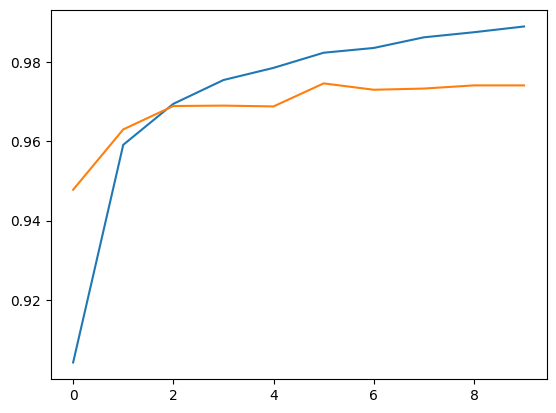

In [47]:
h = model.history.history # 64 32 16 - 2x faster compilation
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

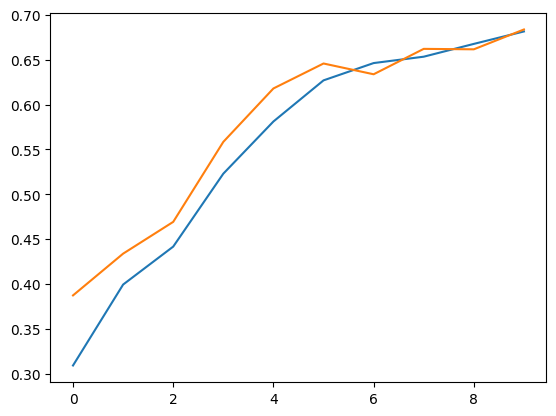

In [52]:
h = model.history.history # 64 1 16 - not faster than 64 32 16
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])